In [447]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [448]:
#Load confirmed_cases Dataset
confirmed_cases = pd.read_csv('Datasets/covid_19_india.csv')
confirmed_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [449]:
#Load deaths_reported Dataset
deaths_reported = pd.read_csv('Datasets/covid_19_india.csv')
deaths_reported.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [450]:
#Converting confirmed_cases dataset into a timeseries Dataset
confirmed_cases.drop(confirmed_cases.columns[[0, 2, 4, 5, 6, 7]], axis = 1, inplace = True)
confirmed_cases = confirmed_cases.groupby(['State/UnionTerritory', 'Date'], sort=False)['Confirmed'].sum().unstack('Date')
confirmed_cases.columns.name = None
confirmed_cases.fillna(0, inplace=True)
confirmed_cases.reset_index(level=0, inplace=True)
confirmed_cases.head()

,State/UnionTerritory,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,...,19/04/20,20/04/20,21/04/20,22/04/20,23/04/20,24/04/20,25/04/20,26/04/20,27/04/20,28/04/20
0,Kerala,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,400.0,402.0,408.0,427.0,438.0,448.0,451.0,458.0,469.0,482.0
1,Telengana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,844.0,873.0,919.0,945.0,960.0,984.0,984.0,991.0,1002.0,1004.0
2,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1893.0,2003.0,2081.0,2156.0,2248.0,2376.0,2514.0,2625.0,2918.0,3108.0
3,Rajasthan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1351.0,1478.0,1576.0,1801.0,1890.0,1964.0,2034.0,2083.0,2185.0,2262.0
4,Uttar Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1084.0,1176.0,1294.0,1412.0,1509.0,1604.0,1778.0,1843.0,1955.0,2043.0


In [451]:
#Converting deaths_reported dataset into a timeseries Dataset
deaths_reported.drop(deaths_reported.columns[[0, 2, 4, 5, 6, 8]], axis = 1, inplace = True)
deaths_reported = deaths_reported.groupby(['State/UnionTerritory', 'Date'], sort=False)['Deaths'].sum().unstack('Date')
deaths_reported.columns.name = None
deaths_reported.fillna(0, inplace=True)
deaths_reported.reset_index(level=0, inplace=True)
deaths_reported.head()

,State/UnionTerritory,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,...,19/04/20,20/04/20,21/04/20,22/04/20,23/04/20,24/04/20,25/04/20,26/04/20,27/04/20,28/04/20
0,Kerala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
1,Telengana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,21.0,23.0,23.0,24.0,26.0,26.0,26.0,26.0,26.0
2,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,45.0,47.0,47.0,48.0,50.0,53.0,54.0,54.0,54.0
3,Rajasthan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,14.0,25.0,25.0,27.0,27.0,27.0,33.0,41.0,46.0
4,Uttar Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,17.0,20.0,21.0,21.0,24.0,26.0,29.0,31.0,31.0


In [452]:
#Extracting only Dates columns that have information of confirmed,Deaths
cols = confirmed_cases.keys()
confirmed = confirmed_cases.loc[:, cols[1]:cols[-1]]
deaths = deaths_reported.loc[:, cols[1]:cols[-1]]

In [453]:
#Finding the total confirmed cases, death cases and the recovered cases and append them to an 3 empty lists
#Also, calculate the total mortality rate which is the death_sum/confirmed_cases
dates = confirmed.keys()
country_cases = []
total_deaths = []
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    country_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)

In [454]:
#Displaying newly created variables
confirmed_sum

29834.0

In [455]:
death_sum

937.0

In [456]:
country_cases

[1.0,
 1.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 5.0,
 6.0,
 28.0,
 30.0,
 31.0,
 34.0,
 39.0,
 46.0,
 58.0,
 60.0,
 74.0,
 81.0,
 84.0,
 110.0,
 114.0,
 137.0,
 151.0,
 173.0,
 223.0,
 283.0,
 360.0,
 433.0,
 519.0,
 606.0,
 694.0,
 724.0,
 909.0,
 1024.0,
 1251.0,
 1397.0,
 1834.0,
 2069.0,
 2547.0,
 3072.0,
 3577.0,
 4281.0,
 4789.0,
 5274.0,
 5865.0,
 6761.0,
 7529.0,
 8447.0,
 9352.0,
 10815.0,
 11933.0,
 12759.0,
 13835.0,
 14792.0,
 16116.0,
 17656.0,
 18985.0,
 20471.0,
 21700.0,
 23452.0,
 24893.0,
 26605.0,
 28160.0,
 29834.0]

In [457]:
total_deaths

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 7.0,
 7.0,
 9.0,
 10.0,
 15.0,
 17.0,
 19.0,
 27.0,
 31.0,
 35.0,
 41.0,
 53.0,
 62.0,
 75.0,
 83.0,
 111.0,
 124.0,
 149.0,
 169.0,
 206.0,
 242.0,
 273.0,
 324.0,
 353.0,
 392.0,
 420.0,
 452.0,
 488.0,
 519.0,
 559.0,
 603.0,
 652.0,
 686.0,
 723.0,
 779.0,
 826.0,
 886.0,
 937.0]

In [458]:
mortality_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.012345679012345678,
 0.023809523809523808,
 0.01818181818181818,
 0.017543859649122806,
 0.021897810218978103,
 0.019867549668874173,
 0.023121387283236993,
 0.017937219730941704,
 0.014134275618374558,
 0.019444444444444445,
 0.016166281755196306,
 0.017341040462427744,
 0.0165016501650165,
 0.021613832853025938,
 0.023480662983425413,
 0.020902090209020903,
 0.0263671875,
 0.02478017585931255,
 0.025053686471009307,
 0.022355507088331516,
 0.025616239729337846,
 0.024342363564978407,
 0.0244140625,
 0.023203802068772716,
 0.02592852137351086,
 0.02589267070369597,
 0.02825180128934395,
 0.028815004262574596,
 0.030468865552433073,
 0.03214238278655864,
 0.032319166568012314,
 0.034644995722840036,
 0.032639852057327785,
 0.0328

In [459]:
#Convert all the dates and the cases in the form of numpy array
days_since_jan_30 = np.array([i for i in range(len(dates))]).reshape(-1,1)
country_cases = np.array(country_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)

In [460]:
#Future forecasting for the next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [461]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [462]:
#Covert all the integers into datatime for better visualization
start = '30/1/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))
future_forecast_dates

['30/01/2020',
 '31/01/2020',
 '01/02/2020',
 '02/02/2020',
 '03/02/2020',
 '04/02/2020',
 '05/02/2020',
 '06/02/2020',
 '07/02/2020',
 '08/02/2020',
 '09/02/2020',
 '10/02/2020',
 '11/02/2020',
 '12/02/2020',
 '13/02/2020',
 '14/02/2020',
 '15/02/2020',
 '16/02/2020',
 '17/02/2020',
 '18/02/2020',
 '19/02/2020',
 '20/02/2020',
 '21/02/2020',
 '22/02/2020',
 '23/02/2020',
 '24/02/2020',
 '25/02/2020',
 '26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '12/03/2020',
 '13/03/2020',
 '14/03/2020',
 '15/03/2020',
 '16/03/2020',
 '17/03/2020',
 '18/03/2020',
 '19/03/2020',
 '20/03/2020',
 '21/03/2020',
 '22/03/2020',
 '23/03/2020',
 '24/03/2020',
 '25/03/2020',
 '26/03/2020',
 '27/03/2020',
 '28/03/2020',
 '29/03/2020',
 '30/03/2020',
 '31/03/2020',
 '01/04/2020',
 '02/04/2020',
 '03/04/2020',
 '04/04/2020',
 '05/04/20

In [463]:
#For visualization latest date of 28th of april
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]

In [464]:
#Confirm cases across various states on 28th april
latest_confirmed

0      482.0
1     1004.0
2     3108.0
3     2262.0
4     2043.0
5      296.0
6       22.0
7     1937.0
8      520.0
9     8590.0
10     313.0
11     546.0
12    1259.0
13      51.0
14     118.0
15       8.0
16     697.0
17      37.0
18      40.0
19    3548.0
20      40.0
21    2368.0
22     346.0
23       2.0
24       1.0
25      33.0
26       7.0
27       0.0
28      38.0
29     103.0
30       1.0
31       2.0
32       0.0
33      12.0
34       0.0
35       0.0
Name: 28/04/20, dtype: float64

In [465]:
#Deaths across various states on 28th april
latest_deaths

0       4.0
1      26.0
2      54.0
3      46.0
4      31.0
5       3.0
6       0.0
7      24.0
8      20.0
9     369.0
10     18.0
11      7.0
12     31.0
13      0.0
14      1.0
15      0.0
16     20.0
17      0.0
18      0.0
19    162.0
20      1.0
21    113.0
22      2.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      1.0
29      3.0
30      0.0
31      0.0
32      0.0
33      1.0
34      0.0
35      0.0
Name: 28/04/20, dtype: float64

In [466]:
#Find the list of unique states
unique_states = list(confirmed_cases['State/UnionTerritory'].unique())
unique_states

['Kerala',
 'Telengana',
 'Delhi',
 'Rajasthan',
 'Uttar Pradesh',
 'Haryana',
 'Ladakh',
 'Tamil Nadu',
 'Karnataka',
 'Maharashtra',
 'Punjab',
 'Jammu and Kashmir',
 'Andhra Pradesh',
 'Uttarakhand',
 'Odisha',
 'Puducherry',
 'West Bengal',
 'Chhattisgarh',
 'Chandigarh',
 'Gujarat',
 'Himachal Pradesh',
 'Madhya Pradesh',
 'Bihar',
 'Manipur',
 'Mizoram',
 'Andaman and Nicobar Islands',
 'Goa',
 'Unassigned',
 'Assam',
 'Jharkhand',
 'Arunachal Pradesh',
 'Tripura',
 'Nagaland',
 'Meghalaya',
 'Nagaland#',
 'Jharkhand#']

In [467]:
#Calculate the total number of confirmed cases across each state
state_confirmed_cases = []
no_cases = []
for i in unique_states:
    cases = latest_confirmed[confirmed_cases['State/UnionTerritory']==i].sum()
    if cases > 0:
        state_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_states.remove(i)

unique_states = [k for k, v in sorted(zip(unique_states, state_confirmed_cases), key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_states)):
    state_confirmed_cases[i] = latest_confirmed[confirmed_cases['State/UnionTerritory']==unique_states[i]].sum() 

In [468]:
#Number of cases per State or UT
print('Confirmed Cases by Countires/Regions:')
for i in range(len(unique_states)):
    print(f'{unique_states[i]}: {state_confirmed_cases[i]} cases')

Confirmed Cases by Countires/Regions:
Maharashtra: 8590.0 cases
Gujarat: 3548.0 cases
Delhi: 3108.0 cases
Madhya Pradesh: 2368.0 cases
Rajasthan: 2262.0 cases
Uttar Pradesh: 2043.0 cases
Tamil Nadu: 1937.0 cases
Andhra Pradesh: 1259.0 cases
Telengana: 1004.0 cases
West Bengal: 697.0 cases
Jammu and Kashmir: 546.0 cases
Karnataka: 520.0 cases
Kerala: 482.0 cases
Bihar: 346.0 cases
Punjab: 313.0 cases
Haryana: 296.0 cases
Odisha: 118.0 cases
Jharkhand: 103.0 cases
Uttarakhand: 51.0 cases
Chandigarh: 40.0 cases
Himachal Pradesh: 40.0 cases
Assam: 38.0 cases
Chhattisgarh: 37.0 cases
Andaman and Nicobar Islands: 33.0 cases
Ladakh: 22.0 cases
Meghalaya: 12.0 cases
Puducherry: 8.0 cases
Goa: 7.0 cases
Manipur: 2.0 cases
Tripura: 2.0 cases
Mizoram: 1.0 cases
Arunachal Pradesh: 1.0 cases


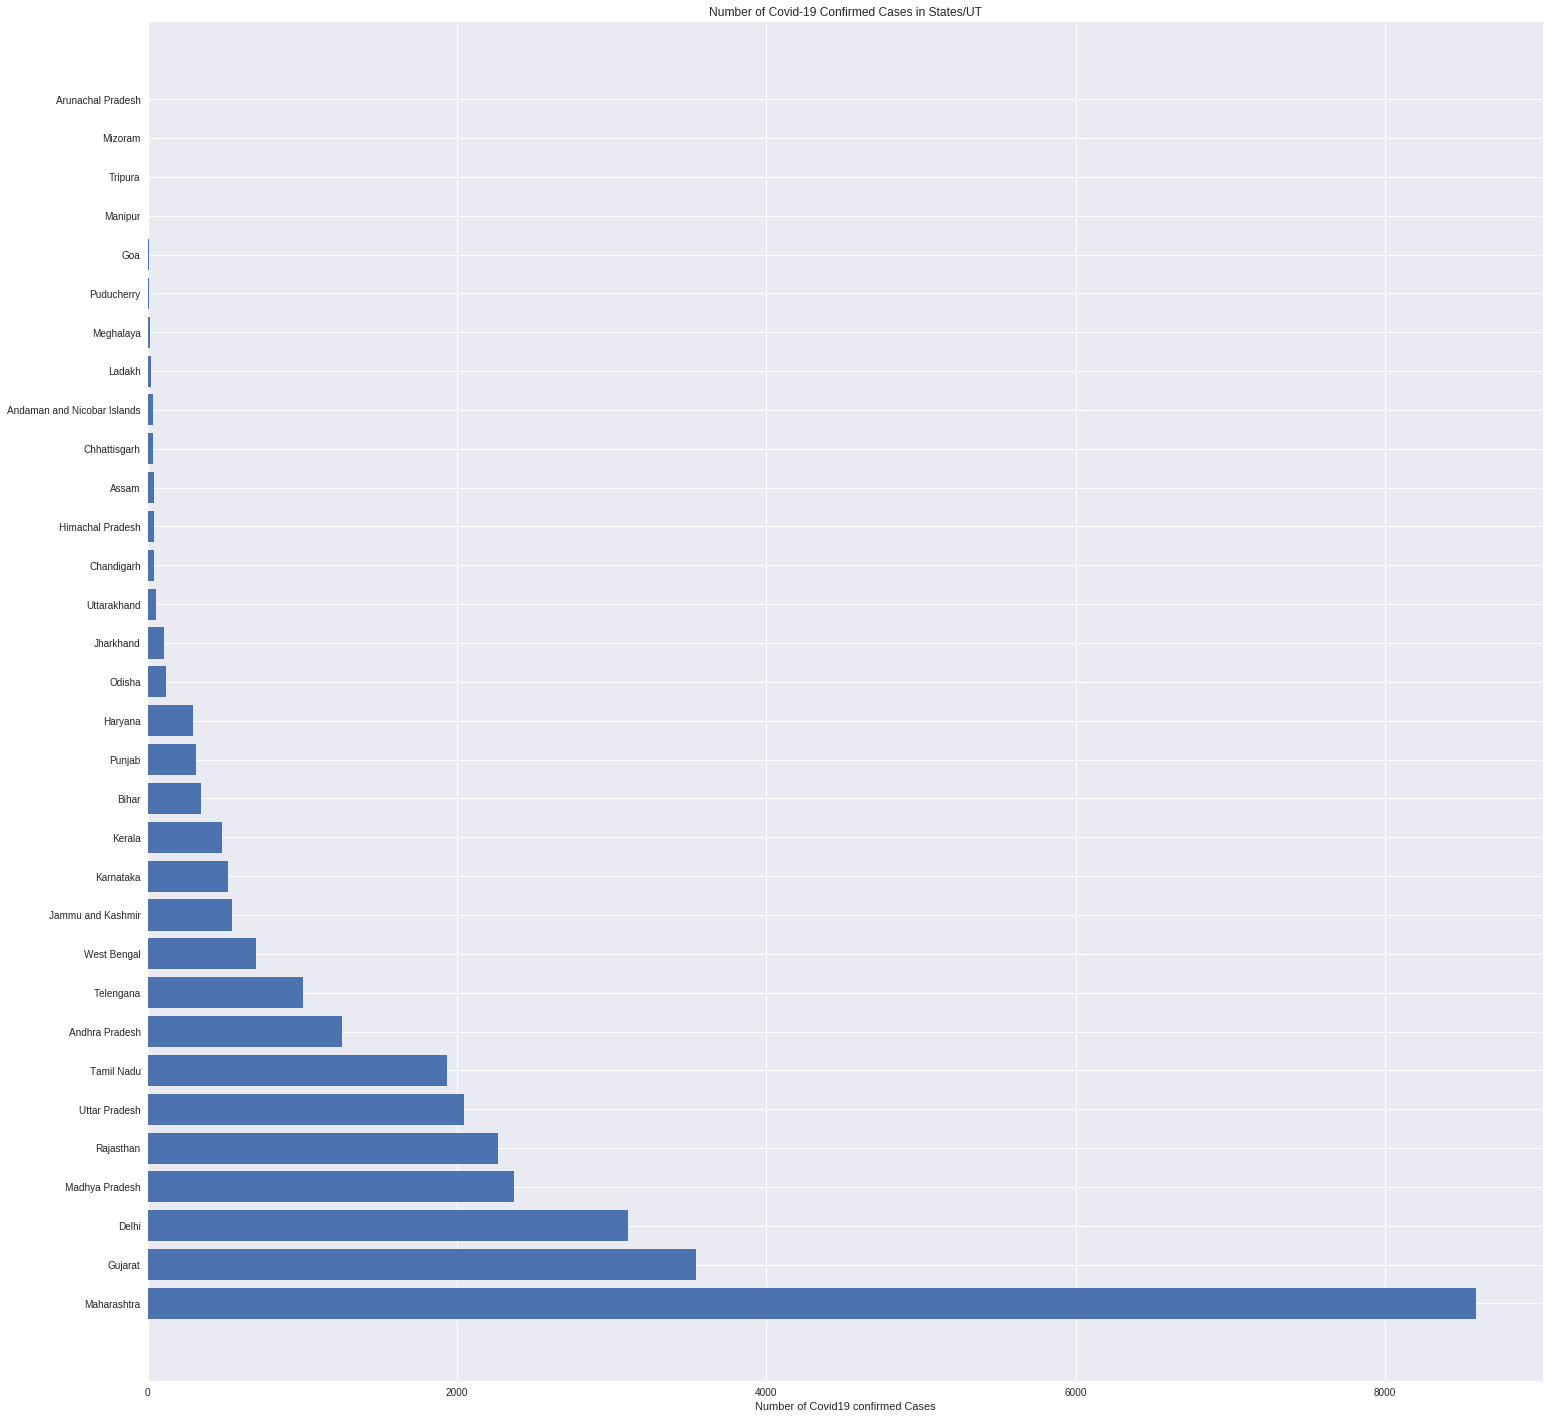

In [469]:
#plot a bar graph to see the total confirmed cases across different states
plt.figure(figsize = (25, 25))
plt.barh(unique_states, state_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in States/UT')
plt.xlabel('Number of Covid19 confirmed Cases')
plt.show()

In [470]:
# Polynomial Linear Regression Model
X_train_confirmed, X_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_jan_30, country_cases, test_size=0.25, shuffle=False)

from sklearn.linear_model import LinearRegression

In [471]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train_confirmed)
poly_reg.fit(X_poly, Y_train_confirmed)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train_confirmed)

test_linear_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test_confirmed))
linear_pred = lin_reg_2.predict(poly_reg.fit_transform(future_forecast))

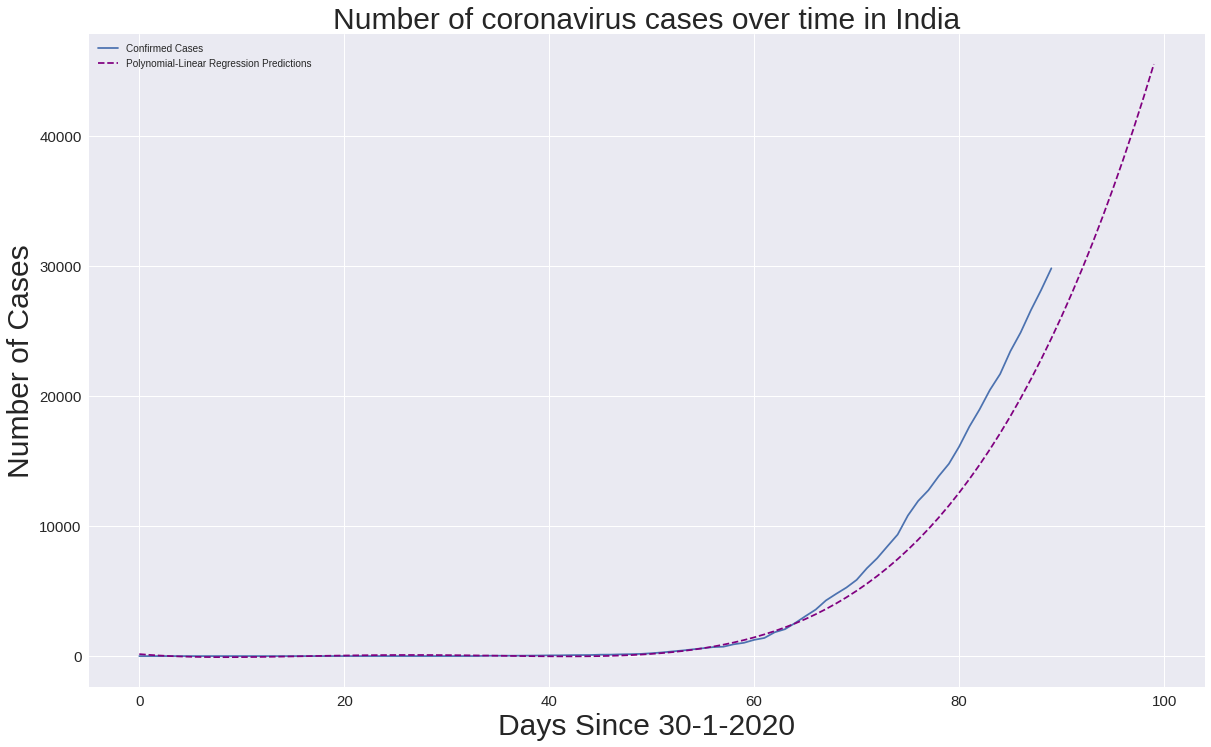

In [472]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, country_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='purple')
plt.title('Number of coronavirus cases over time in India', size=30)
plt.xlabel('Days Since 30-1-2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases', 'Polynomial-Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [473]:
# Predicitons for the next 10 days using Polynomial Linear Regression
print('Next 10 days Predictions using polynomial Linear Regression')
linear_pred[-10:]
df = pd.DataFrame(list(zip(future_forecast_dates[-10:], linear_pred[-10:])), 
               columns =['Date', 'ConfirmedCases']) 
df 

Next 10 days Predictions using polynomial Linear Regression


,Name,val
0,29/04/2020,[26135.664084963882]
1,30/04/2020,[27915.566903936928]
2,01/05/2020,[29782.890817631316]
3,02/05/2020,[31740.38934381062]
4,03/05/2020,[33790.857786881046]
5,04/05/2020,[35937.13323789133]
6,05/05/2020,[38182.09457453274]
7,06/05/2020,[40528.66246113902]
8,07/05/2020,[42979.799348686596]
9,08/05/2020,[45538.509474794286]


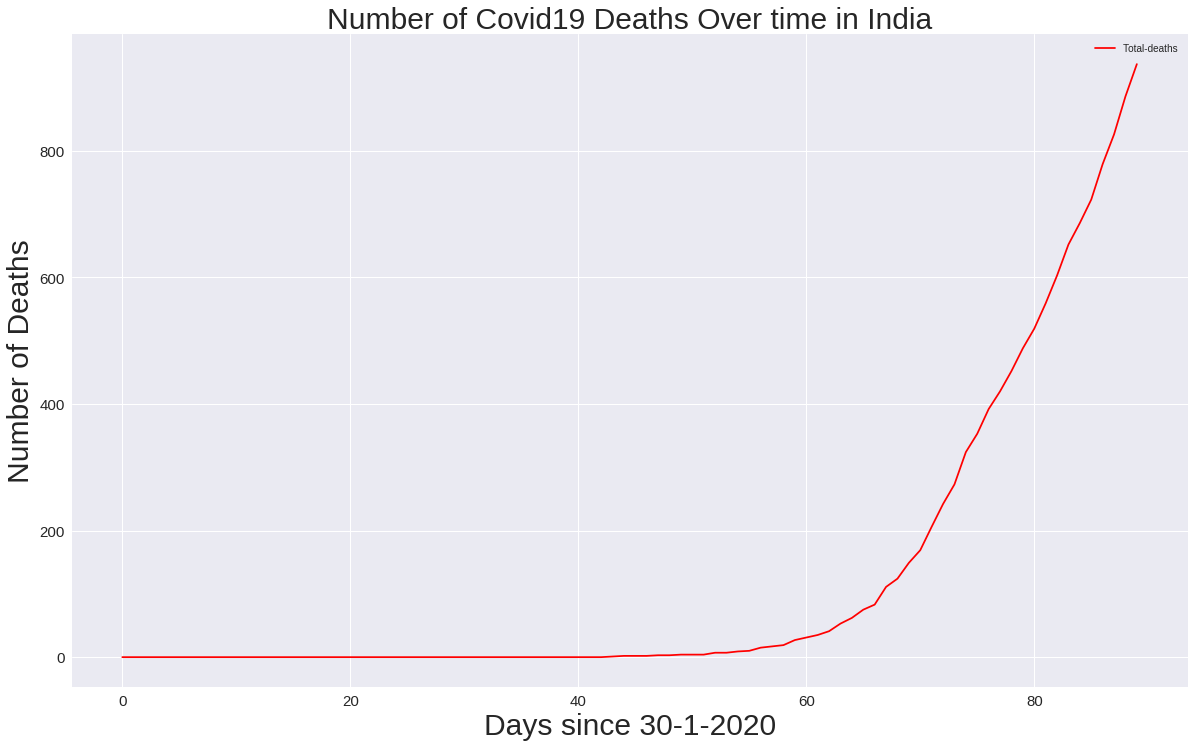

In [474]:
#Total Deaths Over Time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Covid19 Deaths Over time in India', size=30)
plt.xlabel('Days since 30-1-2020', size=30)
plt.ylabel('Number of Deaths',size=30)
plt.legend(['Total-deaths'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

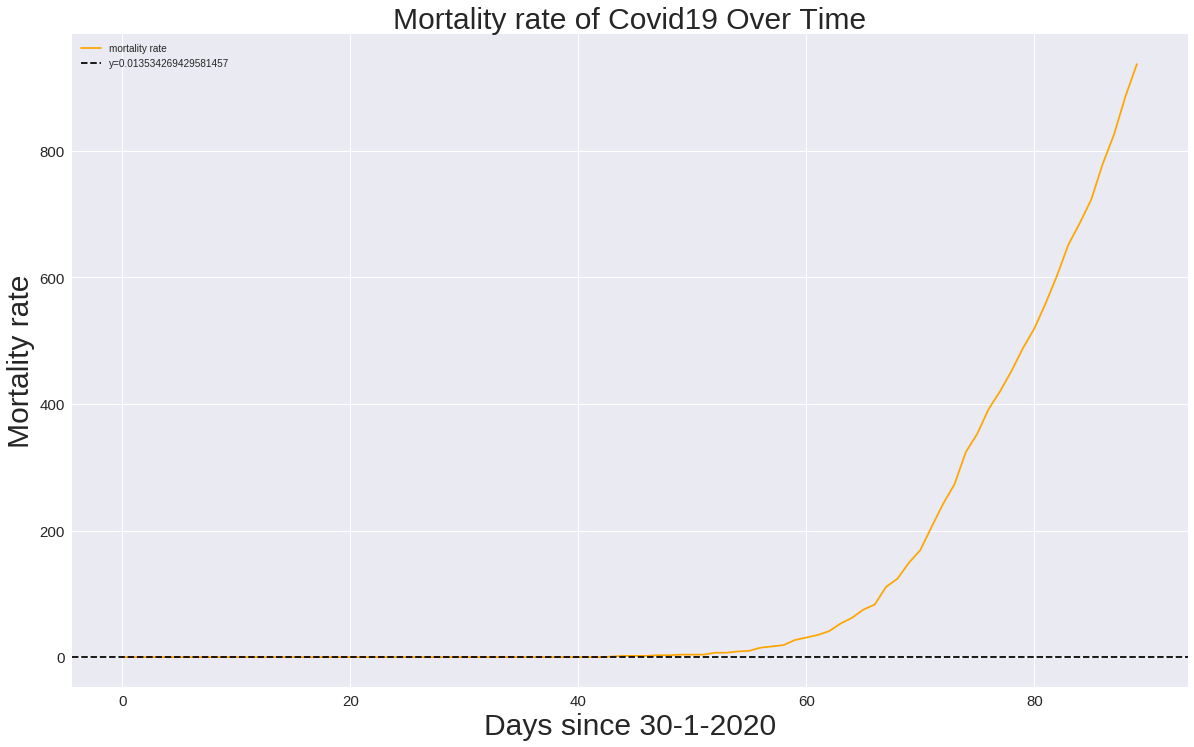

In [475]:
#Mortality Rate, which is the death_sum/confirmed_cases
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--',color='black')
plt.title('Mortality rate of Covid19 Over Time', size=30)
plt.xlabel('Days since 30-1-2020', size=30)
plt.ylabel('Mortality rate',size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()